<a href="https://colab.research.google.com/github/nikhilongo/data_science/blob/main/customer_churn_prediction_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.drop(columns=['customerID'],inplace=True)

In [6]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
460,Male,0,No,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,100.9,No
2829,Male,1,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,560.85,Yes


In [7]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [4]:
tc = pd.to_numeric(df['TotalCharges'],errors='coerce',downcast='integer')

In [9]:
pd.concat([df['TotalCharges'],tc],axis=1)

,TotalCharges,TotalCharges
0,29.85,29.85
1,1889.5,1889.50
2,108.15,108.15
3,1840.75,1840.75
4,151.65,151.65
...,...,...
7038,1990.5,1990.50
7039,7362.9,7362.90
7040,346.45,346.45
7041,306.6,306.60


In [5]:
df['TotalCharges'] = tc

In [11]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [12]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
df.shape

(7043, 20)

In [6]:
df1 = df.dropna()

In [7]:
df1.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


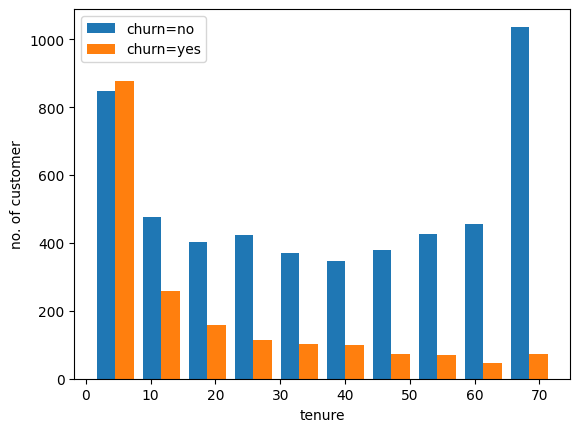

In [20]:
plt.hist([df1[df1.Churn=='No'].tenure,df1[df1.Churn=='Yes'].tenure],label=['churn=no','churn=yes'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('no. of customer')
plt.show()

In [22]:
for col in df:
  if(df[col].dtypes=='object'):
    print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [11]:
df1.replace('No internet service','No',inplace=True)

<ipython-input-11-6ec62bd94ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [12]:
df1.replace('No phone service','No',inplace=True)

<ipython-input-12-1b1036926b6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [13]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [14]:
for i in yes_no_columns:
  df1[i].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-14-368ad517a745>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-14-368ad517a745>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[i].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-14-368ad517a745>:2: SettingWith

In [16]:
df1.replace({'Female':0,'Male':1},inplace=True)

<ipython-input-16-cc71536a07a9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Female':0,'Male':1},inplace=True)
<ipython-input-16-cc71536a07a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Female':0,'Male':1},inplace=True)


In [22]:
for col in df:
  if(df1[col].dtypes=='object'):
    print(f'{col}:{df1[col].unique()}')

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
df2 = pd.get_dummies(df1,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [25]:
df2.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3607,0,0,0,0,13,1,0,1,0,0,...,55.15,742.9,0,False,False,True,False,False,False,True


In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [30]:
# Correct order of assignment for train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2.drop(columns=['Churn']), df2['Churn'], test_size=0.2)

# The rest of the code remains the same
mms = MinMaxScaler()
x_test_scaled = mms.fit_transform(x_test)
x_train_scaled = mms.fit_transform(x_train)

In [32]:
x_train_scaled.shape

(5625, 23)

In [31]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential

In [36]:
model = Sequential(
    [keras.layers.Dense(26,input_shape=(23,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')]
)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7590 - loss: 0.5366
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7916 - loss: 0.4315
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7998 - loss: 0.4148
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4183
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4226
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4124
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.4028
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.3991
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8054 - loss: 0.4098
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.3970


In [37]:
model.evaluate(x_test_scaled,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7969 - loss: 0.4523


[0.4492080807685852, 0.7953091859817505]

In [38]:
predicted = model.predict(x_test_scaled)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
predicted[0]

array([0.54430556], dtype=float32)

In [40]:
p=[]
for i in predicted:
  if(i>0.5):
    p.append(1)
  else:
    p.append(0)

In [41]:
p[0]

1

In [44]:
y_test[0]

0

In [45]:
tf.math.confusion_matrix(y_test,p)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[914,  78],
       [210, 205]], dtype=int32)>